In [1]:
import pandas as pd
import numpy as np
import scipy

data=pd.read_csv("train.csv")
data

,Unnamed: 0,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,2909,28,18,182,58,1350,210,197,117,...,0,0,0,0,0,0,0,0,0,2
1,1,2757,334,30,212,83,1384,137,184,177,...,0,0,0,0,0,0,0,0,0,2
2,2,3283,248,4,150,15,5601,211,243,170,...,0,0,0,0,0,0,1,0,0,1
3,3,3019,330,14,541,-101,1811,186,222,175,...,0,0,0,0,0,0,0,0,0,2
4,4,3039,340,20,474,74,3407,175,207,169,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2521,187,17,30,1,1099,220,250,158,...,0,0,0,0,0,0,0,0,0,6
99996,99996,2891,341,16,30,9,3774,186,215,167,...,0,0,0,0,0,0,0,0,0,2
99997,99997,2563,129,9,134,18,569,236,235,129,...,0,0,0,0,0,0,0,0,0,2
99998,99998,3322,238,14,153,32,2773,195,251,192,...,0,0,0,0,0,0,0,0,0,1


In [3]:
X_train=data.drop(columns=["Cover_Type"])
y_train=data['Cover_Type']


In [5]:
X_test=pd.read_csv("test.csv")
X_test.head(5)

,row_ID,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,0,2767,66,17,210,18,1190,234,204,96,...,1,0,0,0,0,0,0,0,0,0
1,1,2724,160,19,60,4,1350,236,240,127,...,0,0,0,0,0,0,0,0,0,0
2,2,2360,65,7,127,21,1377,227,226,134,...,0,0,0,0,0,0,0,0,0,0
3,3,2995,45,4,285,30,5125,221,231,146,...,0,0,0,0,0,0,0,0,0,0
4,4,2400,106,27,150,63,342,253,196,51,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Supprimer les colonnes d'identification
X_test=X_test.drop(columns=["row_ID"])
X_train=X_train.drop(columns=['Unnamed: 0'])

In [7]:
X_test.head(5)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2767,66,17,210,18,1190,234,204,96,2251,...,1,0,0,0,0,0,0,0,0,0
1,2724,160,19,60,4,1350,236,240,127,2514,...,0,0,0,0,0,0,0,0,0,0
2,2360,65,7,127,21,1377,227,226,134,339,...,0,0,0,0,0,0,0,0,0,0
3,2995,45,4,285,30,5125,221,231,146,5706,...,0,0,0,0,0,0,0,0,0,0
4,2400,106,27,150,63,342,253,196,51,811,...,0,0,0,0,0,0,0,0,0,0


In [21]:
y_train[:5000].value_counts()


Cover_Type
2    2452
1    1770
3     307
7     191
6     170
5      82
4      28
Name: count, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train,y_train)



In [24]:
from sklearn.model_selection import train_test_split



XB_train, XB_test, yB_train, yB_test = train_test_split(X_train,y_train,train_size=0.75, random_state=42)
XS_train, XS_test, yS_train, yS_test = train_test_split(X_sm,y_sm,train_size=0.75,random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score


my_SMOTE_model = RandomForestClassifier(random_state=42)
my_BASE_model = RandomForestClassifier(random_state=42)

my_BASE_model.fit(XB_train,yB_train)



my_SMOTE_model.fit(XS_train,yS_train)


yB_test_prediction = my_BASE_model.predict(XB_test)
yS_test_prediction = my_SMOTE_model.predict(XS_test)
BASE_test_acc = accuracy_score(yB_test,yB_test_prediction)
SMOTE_test_acc = accuracy_score(yS_test,yS_test_prediction)
print(f"Base model test accuracy: {BASE_test_acc}")
print(f"SMOTE model test accuracy: {SMOTE_test_acc}")
#Prints Base as 0.90088, SMOTE as 0.9749

Base model test accuracy: 0.90088
SMOTE model test accuracy: 0.9749010952889661


In [28]:
from sklearn.metrics import f1_score
print(f1_score(yB_test,yB_test_prediction, average="weighted"))
print(f1_score(yS_test,yS_test_prediction,average="weighted"))
#0.8994 et 0.97477

0.8994565201477261
0.9747787257559616


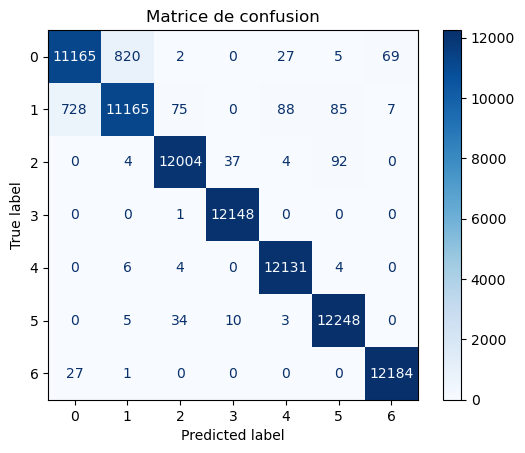

In [45]:

cm = confusion_matrix(yS_test, yS_test_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()



In [19]:
from sklearn.model_selection import cross_val_score, train_test_split,  RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [23]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score

In [38]:

rf = RandomForestClassifier(random_state=42)

param_distributions = {
  
    'max_features':['auto','log2','sqrt'],  #Justifier


    'bootstrap': [True, False], 

    'criterion' :['gini', 'entropy']

     #'max_depth': [5, 10, 20, 30, 40, 50] 
} 



grid = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=30, cv=5, n_jobs=-1, scoring="f1_weighted") #Tester avec accuracy
model_grid=grid.fit(X_sm,y_sm)
rf_best=model_grid.best_estimator_

C:\Users\rober\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 12 is smaller than n_iter=30. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\rober\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rober\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py", li

In [39]:
from joblib import load, dump
#Sauvegarder le modèle
dump(rf_best, 'rf_smooth.joblib')

['rf_smooth.joblib']

In [43]:
rf_best

RandomForestClassifier(bootstrap=False, criterion='entropy', random_state=42)

In [47]:
y_pred=rf_best.predict(X_test)



In [53]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


from joblib import load, dump
from sklearn.model_selection import cross_val_score, train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score



In [49]:
submission_df = pd.DataFrame({
    'row_ID': X_test.index,   
    'Cover_Type': y_pred      
})

submission_df.to_csv('rf_smooth.csv', index=False)